In [224]:
#Installing the required libraries
!pip install mlxtend
!pip install xgboost

In [461]:
import numpy as np                                                              #Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns     
from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [333]:
#Importing the data
df = pd.read_csv("C:\\Users\\talib\\Artificial Intelligence\\Coursework\\CE802_P3_Data\\CE802_P3_Data.csv")
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.00,1.73,3.14,5.73,-5.48,-743.61,152.20,Europe,3,1577.82,-383.82,12,-2289.14,-19.69,High,25354.83,167.75
1,9.84,3.46,6.02,14.42,-10.94,-820.35,68.56,Rest,4,1884.69,-488.34,6,-2899.20,-19.46,Very low,32380.17,704.46
2,4.14,-1.95,6.96,4.27,-7.94,-818.43,107.86,Rest,4,2063.79,-287.76,6,-2885.52,-20.57,Very high,28882.38,302.43
3,20.06,-3.34,3.76,4.78,-6.30,-814.53,147.04,UK,7,1319.19,-435.54,4,-2319.80,-20.24,Very high,28523.04,2420.98
4,63.63,-0.97,11.08,5.66,-9.60,-847.41,99.70,Europe,1,1921.14,-246.45,10,-1344.40,-21.90,Medium,27915.81,271.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,24.31,1.13,8.46,5.33,-9.72,-825.75,114.32,Rest,3,695.19,-153.15,6,-2057.96,-13.74,High,69349.74,2473.75
1496,1.06,1.05,13.70,2.39,1.42,-1108.38,137.60,Rest,2,1360.74,-449.82,4,-2974.08,-29.45,Very low,22585.59,120.67
1497,39.25,-1.64,2.12,7.45,-12.26,-900.42,121.52,Europe,3,716.16,-408.42,4,-3032.14,-26.16,Medium,37818.39,204.91
1498,0.31,-0.76,3.66,4.54,-11.16,-804.75,188.26,Europe,6,1449.69,-316.80,14,-2574.60,-16.49,High,27166.41,306.95


In [334]:
#Checking the null values and data type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   object 
 8   F9      1500 non-null   int64  
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   object 
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [335]:
df['F8'].unique()

array(['Europe', 'Rest', 'UK', 'USA'], dtype=object)

In [336]:
df['F15'].unique()

array(['High', 'Very low', 'Very high', 'Medium', 'Low'], dtype=object)

In [ ]:
df['F15'] = df['F15'].map({'High' : 3, 'Very low' : 0, 'Very high' : 4, 'Medium' : 2, 'Low' : 1})  # Replace numerical values with the help of ordinal encoding


In [ ]:
df = pd.get_dummies(df,columns=['F8']) #One hot encoding
df.info()

In [340]:
df

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F15,F16,Target,F8_Europe,F8_Rest,F8_UK,F8_USA
0,0.00,1.73,3.14,5.73,-5.48,-743.61,152.20,3,1577.82,-383.82,12,-2289.14,-19.69,3,25354.83,167.75,1,0,0,0
1,9.84,3.46,6.02,14.42,-10.94,-820.35,68.56,4,1884.69,-488.34,6,-2899.20,-19.46,0,32380.17,704.46,0,1,0,0
2,4.14,-1.95,6.96,4.27,-7.94,-818.43,107.86,4,2063.79,-287.76,6,-2885.52,-20.57,4,28882.38,302.43,0,1,0,0
3,20.06,-3.34,3.76,4.78,-6.30,-814.53,147.04,7,1319.19,-435.54,4,-2319.80,-20.24,4,28523.04,2420.98,0,0,1,0
4,63.63,-0.97,11.08,5.66,-9.60,-847.41,99.70,1,1921.14,-246.45,10,-1344.40,-21.90,2,27915.81,271.65,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,24.31,1.13,8.46,5.33,-9.72,-825.75,114.32,3,695.19,-153.15,6,-2057.96,-13.74,3,69349.74,2473.75,0,1,0,0
1496,1.06,1.05,13.70,2.39,1.42,-1108.38,137.60,2,1360.74,-449.82,4,-2974.08,-29.45,0,22585.59,120.67,0,1,0,0
1497,39.25,-1.64,2.12,7.45,-12.26,-900.42,121.52,3,716.16,-408.42,4,-3032.14,-26.16,2,37818.39,204.91,1,0,0,0
1498,0.31,-0.76,3.66,4.54,-11.16,-804.75,188.26,6,1449.69,-316.80,14,-2574.60,-16.49,3,27166.41,306.95,1,0,0,0


# DATA EXPLORATION

<AxesSubplot:>

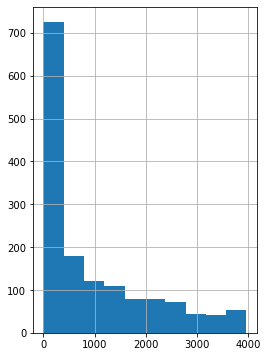

In [341]:
plt.figure(figsize=(4,6))
df["Target"].hist()   

<function matplotlib.pyplot.show(close=None, block=None)>

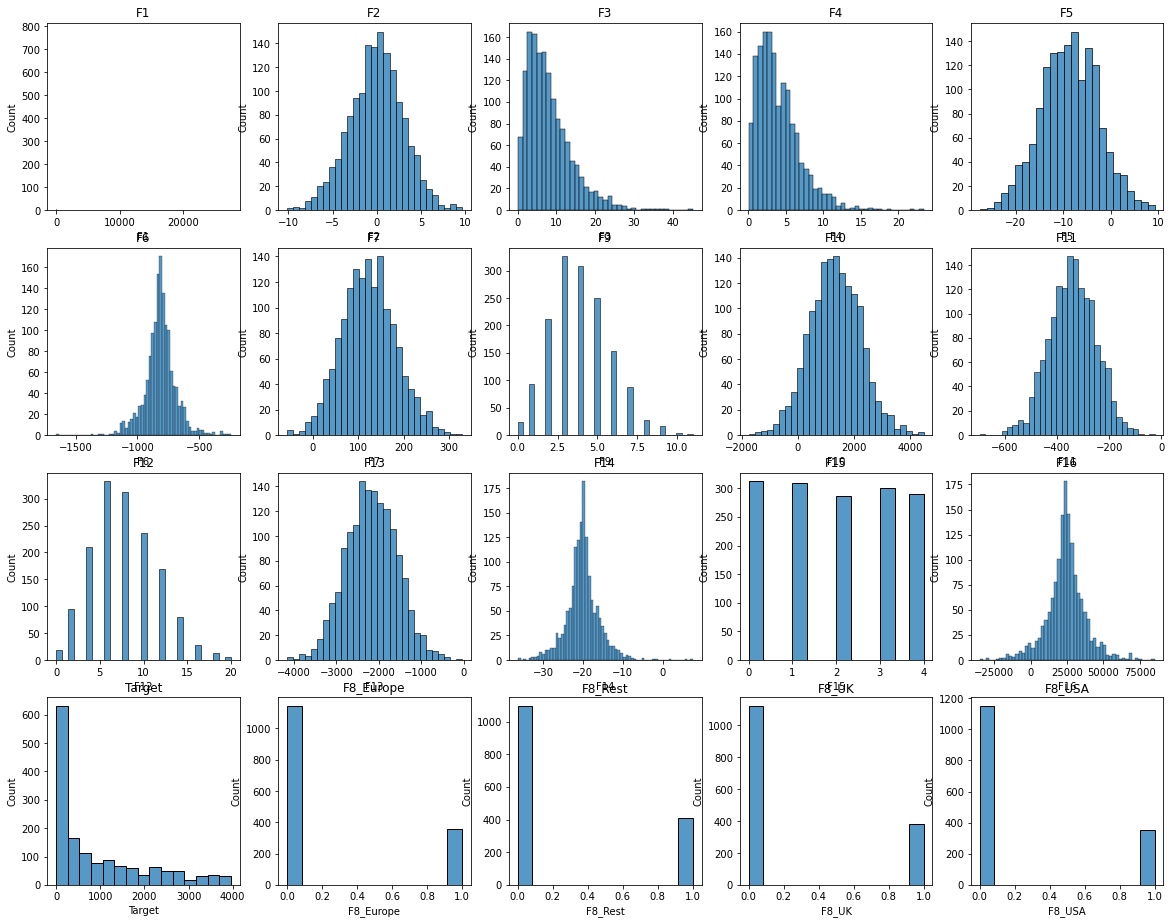

In [342]:
plt.figure(figsize=(20,20))

for i, column in enumerate(df.columns):
  plt.subplot(5,5,i+1)
  sns.histplot(data=df[column])
  plt.title(column)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

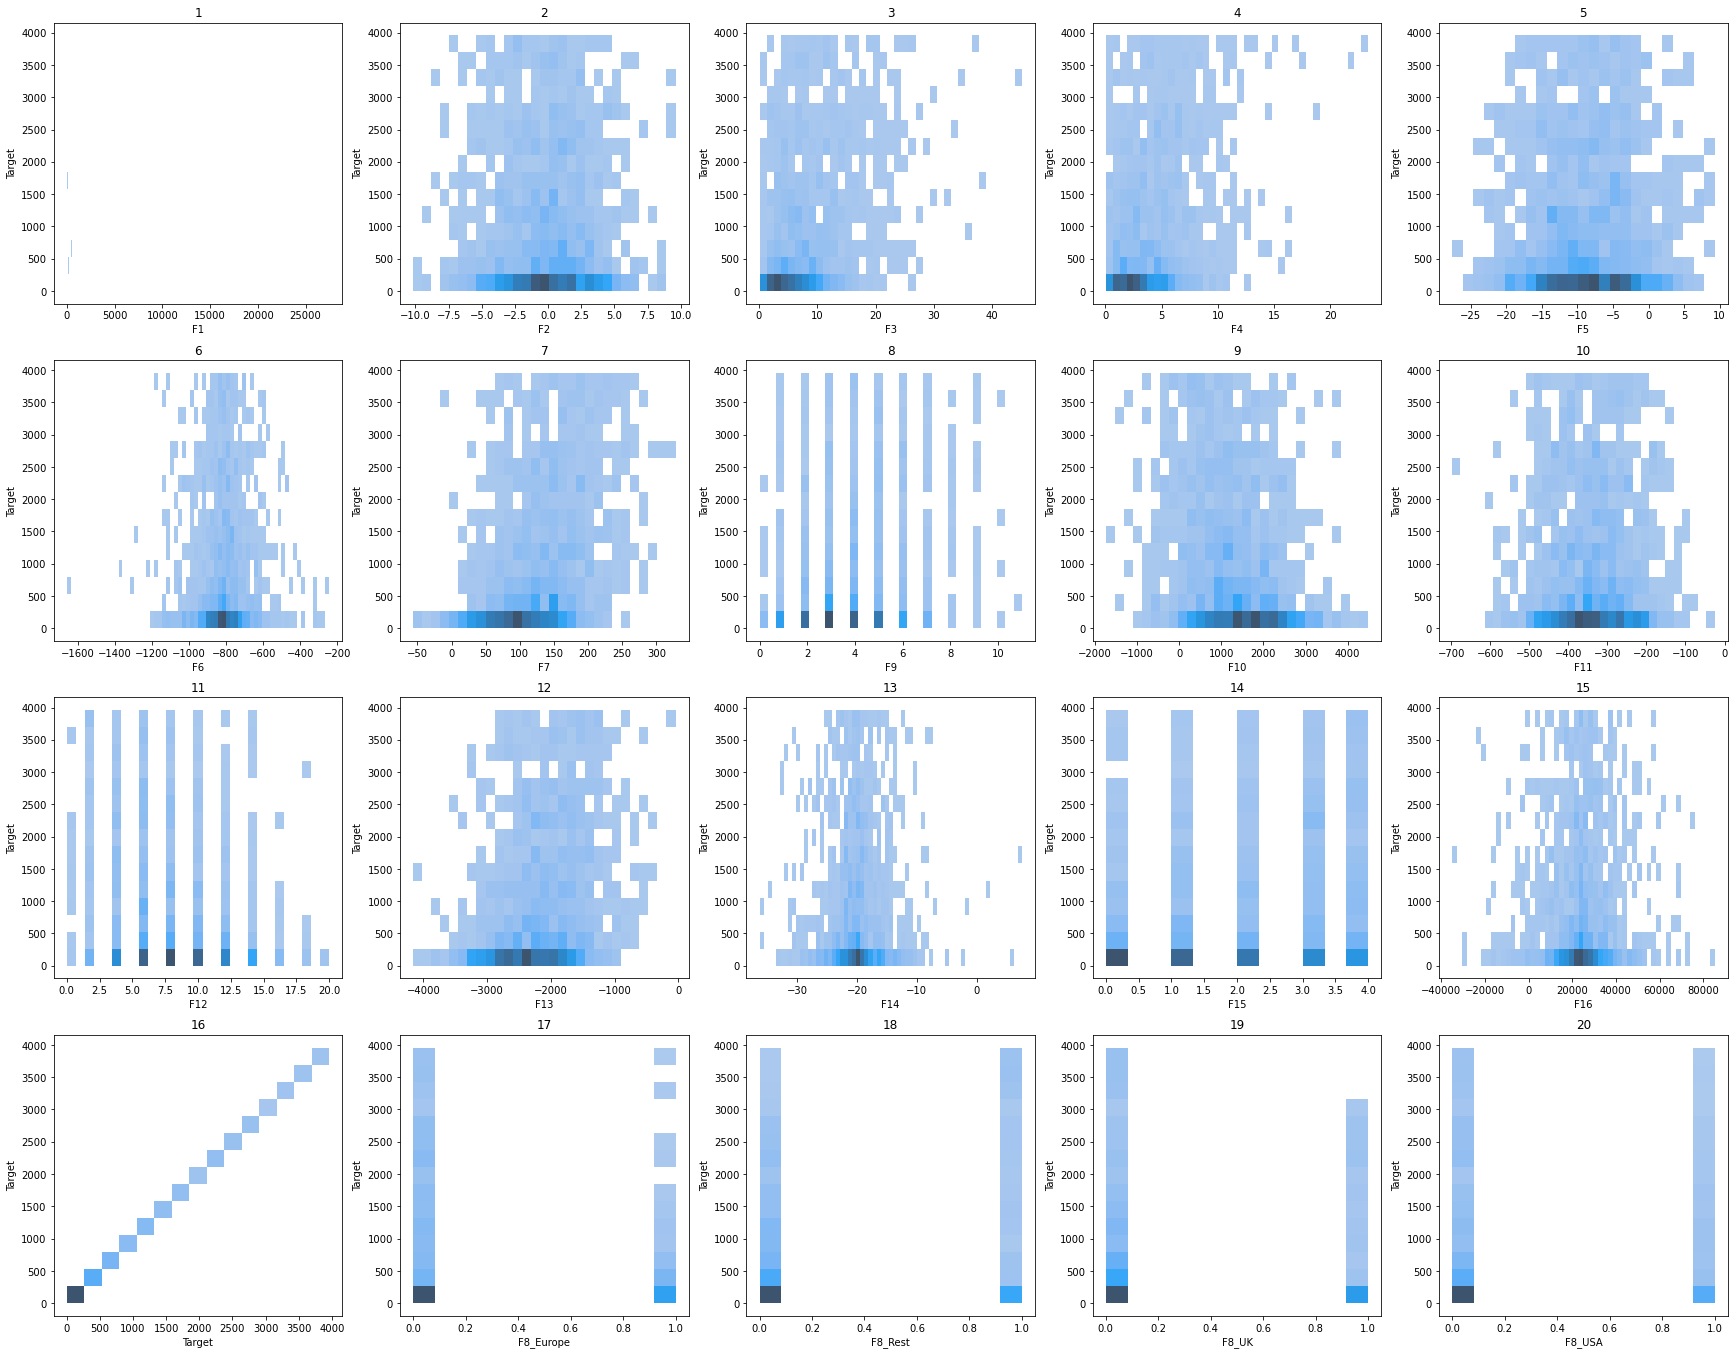

In [343]:
plt.figure(figsize=(30,30))

for i, column in enumerate(df.columns):
  plt.subplot(5,5,i+1)
  sns.histplot(x = df[column],y= df['Target'])
  plt.title(i+1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

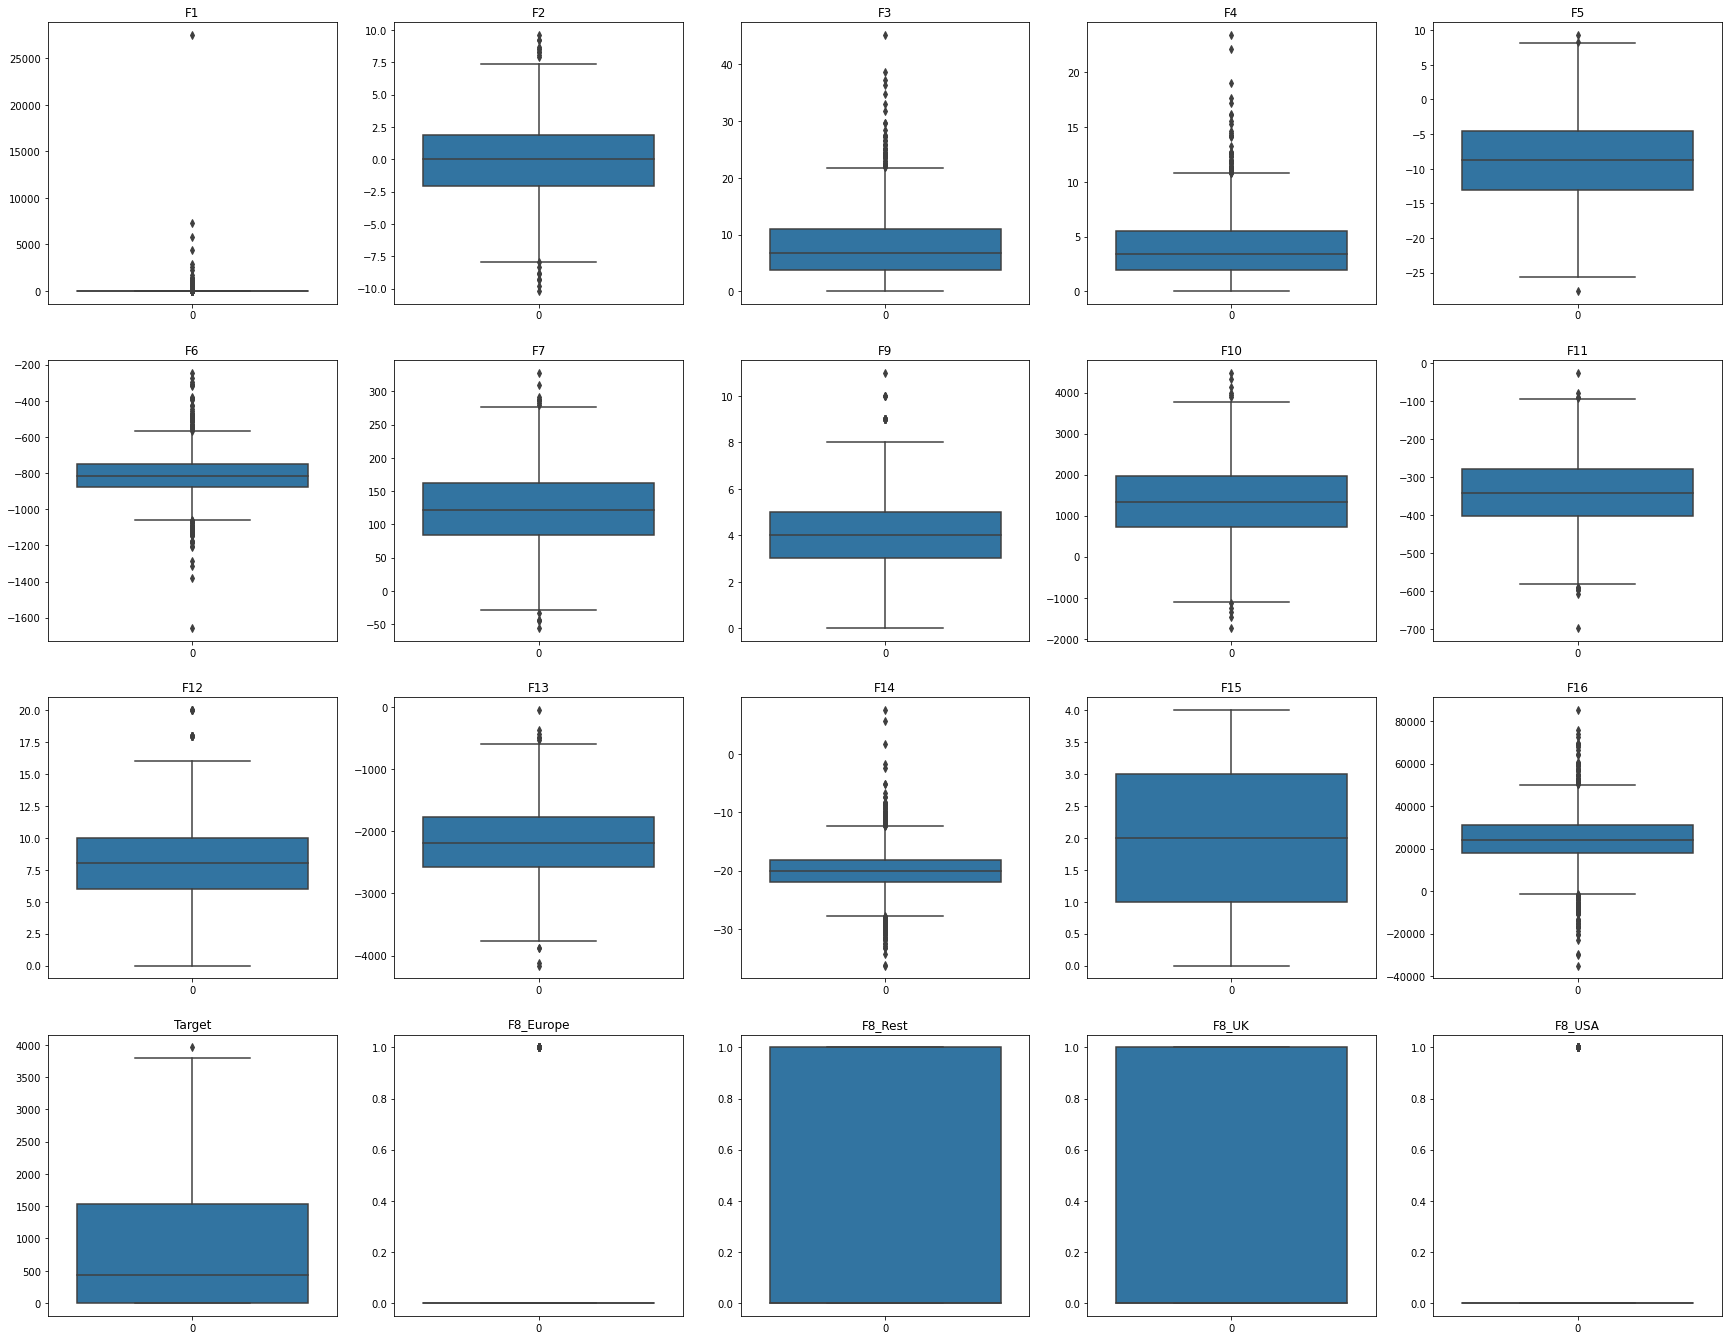

In [344]:
plt.figure(figsize=(30,30))

for i, column in enumerate(df.columns):
  plt.subplot(5,5,i+1)
  sns.boxplot(data=df[column])
  plt.title(column)
plt.show

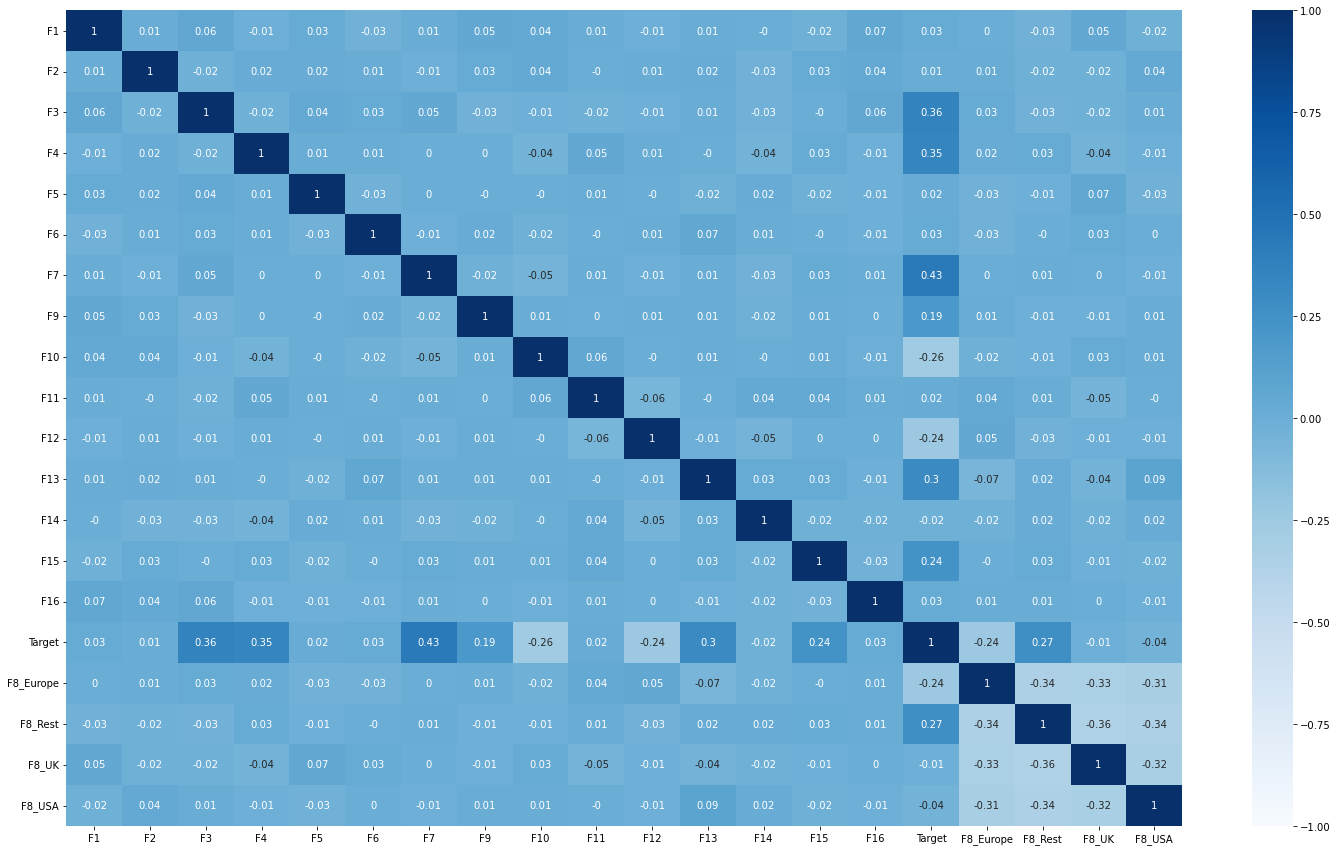

In [345]:
plt.figure(figsize=(25,15))
sns.heatmap(round(df.corr(),2),annot=True, vmin = -1.0, cmap= "Blues")
plt.show()

In [346]:
X =df.drop(columns=['Target'],axis=1)                                       # Removing the target column from the date and assigning it to variable y
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Baseline Model

In [259]:
model_lr = XGBRegressor()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
model_lr.score(X_test,y_test)

0.6728468644623922

In [440]:
#Checking the importance of each feature for Feature Engineering
x = sm.add_constant(X_train)
q = (sm.OLS(y_train,x)).fit()
q.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     239.4
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        08:56:12   Log-Likelihood:                -9010.8
No. Observations:                1180   AIC:                         1.806e+04
Df Residuals:                    1161   BIC:                         1.816e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        937.8831     14.714     63.741      0.000     909.014     966.752
x1            20.3793     14.802      1.377      0.169      -8.662      49.421
x2            13.3839     14.836      0.902      0.367     -15.725      42.493
x3           378.8693     14.857     25.500      0.000     349.719     408.020
x4           354.4522     14.777     23.987      0.000     325.459     383.445
x5             8.5396     14.806      0.577      0.564     -20.511      37.590
x6            -9.4954     14.812     -0.641      0.522     -38.557      19.566
x7           437.5056     14.780     29.602      0.000     408.508     466.504
x8           229.5065     14.743     15.567      0.000     200.581     258.432
x9          -254.9539     14.822    -17.201      0.000    -284.035    -225.873
x10            0.1022     14.842      0.007      0.995     -29.018      29.223
x11         -237.4720     14.817    -16.027      0.000    -266.542    -208.402
x12          290.5674     14.920     19.475      0.000     261.294     319.841
x13           -8.1209     14.832     -0.548      0.584     -37.221      20.979
x14          228.5986     14.798     15.448      0.000     199.565     257.632
x15            1.3796     14.806      0.093      0.926     -27.670      30.429
x16         -199.8827     11.132    -17.956      0.000    -221.724    -178.042
x17          212.3195     10.918     19.447      0.000     190.898     233.741
x18           29.0769     11.125      2.614      0.009       7.249      50.905
x19          -46.8284     11.251     -4.162      0.000     -68.903     -24.754
==============================================================================
Omnibus:                      102.205   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.821
Skew:                           0.767   Prob(JB):                     1.75e-28
Kurtosis:                       3.499   Cond. No.                     2.66e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [441]:
# Using XGBoost to know the importance of the features
sfs1 = SFS(XGBRegressor(), k_features=16,forward=True,scoring='neg_mean_squared_error',cv=5)

sfs1.fit(X,y)
sfs1.subsets_


{1: {'feature_idx': (16,),
  'cv_scores': array([-1224490.62716629,  -986446.57399818, -1167473.67846502,
         -1161817.47915802, -1016833.88074889]),
  'avg_score': -1111412.4479072806,
  'feature_names': ('F8_Rest',)},
 2: {'feature_idx': (13, 16),
  'cv_scores': array([-1132767.75061657,  -929682.23993165, -1119848.87914999,
         -1118592.58024006,  -970426.73615787]),
  'avg_score': -1054263.6372192274,
  'feature_names': ('F15', 'F8_Rest')},
 3: {'feature_idx': (13, 15, 16),
  'cv_scores': array([-1100317.21992915,  -891857.14581923, -1091140.20892215,
         -1080329.65149446,  -964298.48474725]),
  'avg_score': -1025588.5421824476,
  'feature_names': ('F15', 'F8_Europe', 'F8_Rest')},
 4: {'feature_idx': (13, 15, 16, 18),
  'cv_scores': array([-1115379.23624402,  -904436.77902142, -1099986.27262716,
         -1074077.63747049,  -956209.75888671]),
  'avg_score': -1030017.9368499592,
  'feature_names': ('F15', 'F8_Europe', 'F8_Rest', 'F8_USA')},
 5: {'feature_idx': (13, 

In [414]:
# Creating a new dataset by dropping irrelevant features
new = df.filter(['F3',
   'F4',
   'F7',
   'F9',
   'F10',
   'F12',
   'F13',
   'F15',
   'F8_Europe',
   'F8_Rest',
   'F8_UK',
   'F8_USA','Target'])
new
X2 =new.drop(columns=['Target'],axis=1)                                       # Removing the target column from the date and assigning it to variable y
y2=new['Target']
scaler = StandardScaler()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, shuffle=True, random_state=42)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.fit_transform(X2_test)

In [350]:
# Train/Test Split
X =df.drop(columns=['Target'],axis=1)                                       # Removing the target column from the date and assigning it to variable y
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [351]:
# Checking the performance of our baseline model
model_lr = XGBRegressor()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
model_lr.score(X_test,y_test)

0.7389718696085465

# CROSS-VALIDATION

In [377]:
params_lr = {
    "fit_intercept": [True,False],
    "normalize" :[True,False],
    "copy_X" : [True,False],
    "positive" : [True,False] 
            }

gs_lr = GridSearchCV(
                                       estimator=LinearRegression(), 
                                       param_grid=params_lr,
                                       scoring="accuracy",
                                       n_jobs=4,
                                       cv=5,
                                       return_train_score = True,
                                       verbose=10

                                )
#Fitting the model for RandomCV
gs_lr.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=4,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [378]:
#Checking the best estimators for the model
gs_lr.best_estimator_

LinearRegression(normalize=True, positive=True)

0.6777184731206627
483.1382510860012


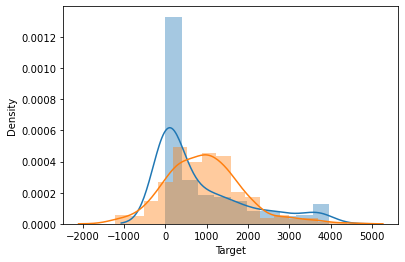

In [519]:
#Using the best estimators to test the model performance
model_lr = LinearRegression(normalize=True, positive=True)
cv_lr = model_selection.cross_val_score(model_lr, X2_train, y2_train, cv=10, scoring='r2').mean()
print(cv_lr)
model_lr.fit(X2_train, y2_train)
y_pred_lr = model_lr.predict(X2_test)
mse = mean_absolute_error(y2_test, y_pred_lr) #Mean Absolute Error
print(mse)
sns.distplot(y2_test) # Plotting a distplot to know the distribution of the predicted and actual labels
sns.distplot(y_pred_lr)
plt.savefig('lr.png')

# MLP Regressor

In [382]:
#Training a deep learning model
params_mlp = {
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'power_t': [0.1,0.5,0.8],
            'shuffle': [True,False],
            'warm_start': [True,False],
            'nesterovs_momentum': [True,False],
            'early_stopping': [True],
            'validation_fraction': [0.1,0.5,0.8]
        }
gs_mlp = GridSearchCV(
                                       estimator=MLPRegressor(), 
                                       param_grid=params_mlp,
                                       scoring="r2",
                                       n_jobs=4,
                                       cv=5,
                                       return_train_score = True,
                                       verbose=10

                                )
#Fitting the model for RandomCV
gs_mlp.fit(X2_train,y2_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=4,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'early_stopping': [True],
                         'nesterovs_momentum': [True, False],
                         'power_t': [0.1, 0.5, 0.8], 'shuffle': [True, False],
                         'validation_fraction': [0.1, 0.5, 0.8],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='r2', verbose=10)

In [383]:
gs_mlp.best_estimator_

MLPRegressor(early_stopping=True, nesterovs_momentum=False, power_t=0.8,
             shuffle=False, warm_start=True)

In [503]:
model_mlp = MLPRegressor(validation_fraction= 0.8, solver='sgd', shuffle= True, power_t= 0.8, nesterovs_momentum= False, early_stopping= False, activation= 'logistic')
cv_mlp = model_selection.cross_val_score(model_mlp, X2_train, y2_train, cv=10, scoring='r2').mean()
print(cv_rfr)
model_mlp.fit(X2_train, y2_train)
y_pred_mlp = model_mlp.predict(X2_test)
mse = mean_absolute_error(y2_test, y_pred_mlp)
print(mse)

0.7673795815723125
58.53833462872187


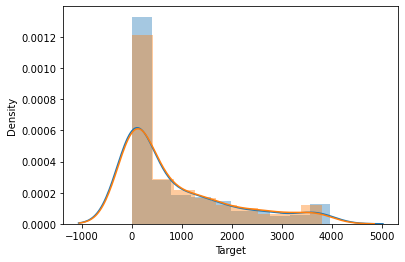

In [520]:
sns.distplot(y2_test)
sns.distplot(y_pred_mlp)
plt.savefig('mlp.png')

In [492]:
pd.DataFrame(y_pred_mlp)

,0
0,2654.165052
1,500.931948
2,-0.794038
3,13.455901
4,594.385499
...,...
291,3412.254086
292,-0.799908
293,874.384185
294,-0.812167


# Random Forest Regressor

In [485]:
params_rfr = {
            'max_depth'               : [7,8,9,10], 
            'min_samples_leaf'        : [3,5,6,10], 
            'min_samples_split'       : [3,5,6], 
            'n_estimators'            : [150,200,250]
}

gs_rfr = GridSearchCV(
                                       estimator=RandomForestRegressor(), 
                                       param_grid=params_rfr,
                                       scoring="r2",
                                       n_jobs=4,
                                       cv=5,
                                       return_train_score = True,
                                       verbose=10

                                )

#Fitting the model for RandomCV
gs_rfr.fit(X2_train,y2_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [3, 5, 6, 10],
                         'min_samples_split': [3, 5, 6],
                         'n_estimators': [150, 200, 250]},
             return_train_score=True, scoring='r2', verbose=10)

In [ ]:
gs_rfr.best_estimator_

In [ ]:
model_rfr = RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400)
model_rfr.fit(X2_train,y2_train)
cv_rfr = model_selection.cross_val_score(model_rfr, X2_train, y2_train, cv=10, scoring='r2').mean()
print(cv_rfr)
model_rfr.fit(X2_train, y2_train)
y_pred_rfr = model_rfr.predict(X2_test)
mse = mean_absolute_error(y2_test, y_pred_rfr)
print(mse)

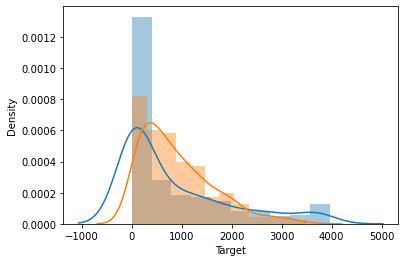

In [521]:
sns.distplot(y2_test)
sns.distplot(y_pred_rfr)
plt.savefig('rfr.png')

# XGBoost

In [451]:
param_xgb={
    'max_depth'          : np.arange(2,20), 
    "learning_rate"      : [ 0.01, 0.1 , 0.15 , 0.20, 0.23, 0.25,0.28, 0.30], 
    "n_estimators"       : [100,115,120,125,130,140,150,160,170,180,190,200],
    "gamma"              : [ 0.0,0.01,0.05,0.1,0.15],
    "colsample_bytree"   : [ 0.2,0.3,0.4,0.45,0.5] 
    }
grid_search_xgb = RandomizedSearchCV(
                                   estimator = XGBRegressor(),
                                   param_distributions=param_xgb,
                                   scoring="neg_mean_absolute_error",
                                       n_iter=1000,
                                       n_jobs=4,
                                       cv=5,
                                       return_train_score = True,
                                       verbose=3)

#Fitting the model for RandomCV
grid_search_xgb.fit(X2_train,y2_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.4,
                              

In [452]:
grid_search_xgb.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.15, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=190, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

0.8449212492022727
334.2995401716071


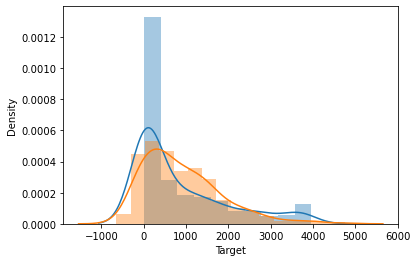

In [522]:
v = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.15, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=190, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

c = model_selection.cross_val_score(v, X2_train, y2_train, cv=10, scoring='r2').mean()
print(c)
v.fit(X2_train, y2_train)
y_pred_xgb = v.predict(X2_test)
mse = mean_absolute_error(y2_test, y_pred_xgb)
print(mse)
sns.distplot(y2_test)
sns.distplot(y_pred_xgb)
plt.savefig('xgb.png')

# Test Data Prediction

In [528]:
test = pd.read_csv("C:\\Users\\talib\\Artificial Intelligence\\Coursework\\CE802_P3_Data\\CE802_P3_test.csv")

In [529]:
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.04,-0.21,3.68,1.54,-6.70,-929.34,234.18,USA,2,3391.35,-415.41,6,-1460.14,-20.55,Low,31369.98,NaN
1,0.89,2.97,2.28,1.97,-4.52,-700.62,106.84,Rest,2,3479.19,-320.73,2,-2301.76,-27.90,Low,29173.89,NaN
2,0.37,-0.17,7.14,0.40,-14.26,-796.14,32.30,USA,5,918.93,-379.44,4,-2589.08,-20.52,Very low,17248.26,NaN
3,5.37,0.07,7.18,6.81,-6.14,-801.03,32.92,Europe,2,2657.43,-491.28,6,-1767.44,-25.81,Low,15450.54,NaN
4,0.26,6.16,3.54,1.10,-16.76,-652.08,227.98,Rest,4,2739.96,-378.48,10,-1823.32,-23.11,Very low,35745.03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.27,-1.82,3.06,1.81,-0.56,-843.15,230.60,UK,0,669.90,-365.52,4,-3161.20,-18.92,Medium,23327.58,NaN
1496,4.69,0.87,4.88,5.08,-6.64,-827.76,90.38,UK,6,3327.69,-373.65,6,-2326.00,-16.44,Medium,17878.32,NaN
1497,15.05,3.14,2.64,3.74,-3.92,-716.73,55.62,USA,4,238.56,-336.75,6,-2140.10,-19.13,Very low,32403.66,NaN
1498,0.04,-1.55,11.22,6.41,-10.80,-869.10,82.80,USA,6,4278.54,-357.03,8,-2232.92,-19.19,Very low,19319.28,NaN


In [530]:
#Feature Engineering on the test data so that our model can perform in the best way
test['F15'] = test['F15'].map({'High' : 3, 'Very low' : 0, 'Very high' : 4, 'Medium' : 2, 'Low' : 1})
df_test = pd.get_dummies(test,columns=['F8'])
df_test = df_test.filter(['F3',
   'F4',
   'F7',
   'F9',
   'F10',
   'F12',
   'F13',
   'F15',
   'F8_Europe',
   'F8_Rest',
   'F8_UK',
   'F8_USA','Target'])
df_test =df_test.drop(columns=['Target'],axis=1)
df_test = scaler.fit_transform(df_test)
pd.DataFrame(df_test)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.752986,-0.871147,1.823616,-1.089150,2.264468,-0.574371,1.184141,-0.690986,-0.587615,-0.579403,-0.570165,1.747585
1,-1.003180,-0.719630,-0.263365,-1.089150,2.360759,-1.687492,-0.210805,-0.690986,-0.587615,1.725914,-0.570165,-0.572218
2,-0.134652,-1.272844,-1.485005,0.553885,-0.445817,-1.130931,-0.687024,-1.389893,-0.587615,-0.579403,-0.570165,1.747585
3,-0.127503,0.985821,-1.474844,-1.089150,1.459940,-0.574371,0.674805,-0.690986,1.701794,-0.579403,-0.570165,-0.572218
4,-0.778006,-1.026188,1.722004,0.006207,1.550410,0.538751,0.582187,-1.389893,-0.587615,1.725914,-0.570165,-0.572218
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.863786,-0.776008,1.764943,-2.184506,-0.718805,-1.130931,-1.635286,0.007921,-0.587615,-0.579403,1.753878,-0.572218
1496,-0.538535,0.376228,-0.533129,1.101564,2.194683,-0.574371,-0.250981,0.007921,-0.587615,-0.579403,1.753878,-0.572218
1497,-0.938844,-0.095942,-1.102813,0.006207,-1.191643,-0.574371,0.057139,-1.389893,-0.587615,-0.579403,-0.570165,1.747585
1498,0.594483,0.844875,-0.657358,1.101564,3.237012,-0.017810,-0.096706,-1.389893,-0.587615,-0.579403,-0.570165,1.747585


In [531]:
#Predicting the test data with the best performed model
model_mlp.fit(X2_train,y2_train)
y_final = model_mlp.predict(df_test)

In [532]:
test['Target'] = y_final.tolist()

In [533]:
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.04,-0.21,3.68,1.54,-6.70,-929.34,234.18,USA,2,3391.35,-415.41,6,-1460.14,-20.55,1,31369.98,451.773710
1,0.89,2.97,2.28,1.97,-4.52,-700.62,106.84,Rest,2,3479.19,-320.73,2,-2301.76,-27.90,1,29173.89,0.131901
2,0.37,-0.17,7.14,0.40,-14.26,-796.14,32.30,USA,5,918.93,-379.44,4,-2589.08,-20.52,0,17248.26,0.144729
3,5.37,0.07,7.18,6.81,-6.14,-801.03,32.92,Europe,2,2657.43,-491.28,6,-1767.44,-25.81,1,15450.54,0.737833
4,0.26,6.16,3.54,1.10,-16.76,-652.08,227.98,Rest,4,2739.96,-378.48,10,-1823.32,-23.11,0,35745.03,152.057881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.27,-1.82,3.06,1.81,-0.56,-843.15,230.60,UK,0,669.90,-365.52,4,-3161.20,-18.92,2,23327.58,187.457302
1496,4.69,0.87,4.88,5.08,-6.64,-827.76,90.38,UK,6,3327.69,-373.65,6,-2326.00,-16.44,2,17878.32,13.239284
1497,15.05,3.14,2.64,3.74,-3.92,-716.73,55.62,USA,4,238.56,-336.75,6,-2140.10,-19.13,0,32403.66,6.455074
1498,0.04,-1.55,11.22,6.41,-10.80,-869.10,82.80,USA,6,4278.54,-357.03,8,-2232.92,-19.19,0,19319.28,24.681644


In [535]:
# Exporting CSV file with variables
export_file = test.to_csv('C:\\Users\\talib\\Artificial Intelligence\\Coursework\\CE802_P3_Data\\testP3.csv')
export_file